## 分离接触对象
分水岭算法的一个常见用例是分离接触的对象。在本笔记本中，我们将分离二值图像中具有圆形形状且相互接触的对象。

In [1]:
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari_simpleitk_image_processing as nsitk
import stackview

这个过程的起点是一个二值图像，例如使用[阈值分割](image-segmentation:thresholding)制作的图像。

StackViewNDArray([[ 19,  29,  44, ...,  88, 115, 113],
                  [ 19,  29,  55, ...,  87, 101, 112],
                  [ 25,  36,  61, ...,  90,  90, 106],
                  ...,
                  [ 20,  21,  20, ...,  57,  33,  40],
                  [ 22,  25,  25, ...,  41,  34,  40],
                  [ 20,  25,  18, ...,  41,  35,  39]], dtype=uint8)
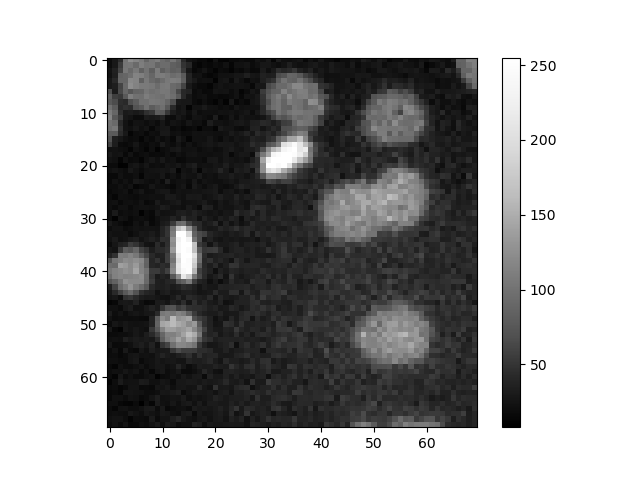
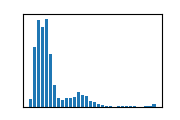

In [2]:
nuclei = imread('../../data/mitosis_mod.tif')

stackview.insight(nuclei)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
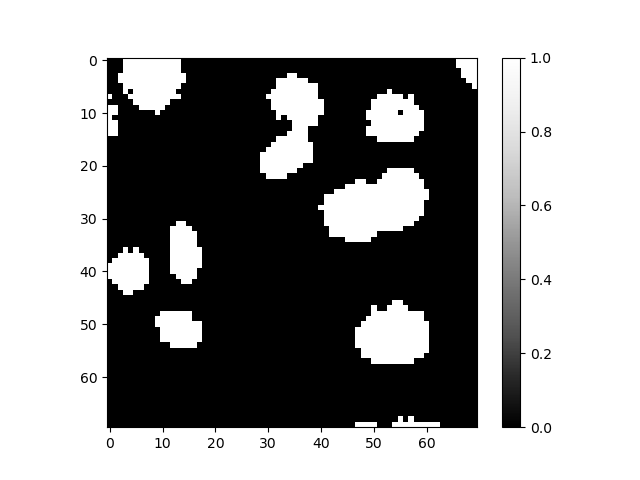
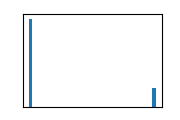

In [3]:
binary = nsbatwm.threshold_otsu(nuclei).astype(bool)

binary

然后，我们可以通过仅考虑二值图像来分离接触的对象。底层算法旨在产生与[ImageJ的二值分水岭算法](https://imagej.nih.gov/ij/docs/menus/process.html#watershed)类似的结果，这里的实现也适用于3D图像。

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
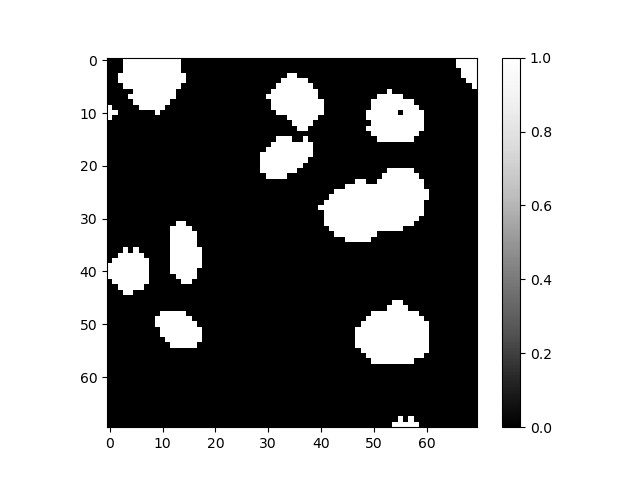
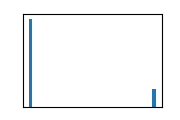

In [4]:
split_objects = nsbatwm.split_touching_objects(binary)
split_objects

`split_touching_objects`函数还有一个参数`sigma`，用于控制对象应该被分割得多激进。要进行更多分割，输入一个小于默认值3.5的数字。

StackViewNDArray([[False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  [False, False, False, ...,  True,  True,  True],
                  ...,
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False],
                  [False, False, False, ..., False, False, False]])
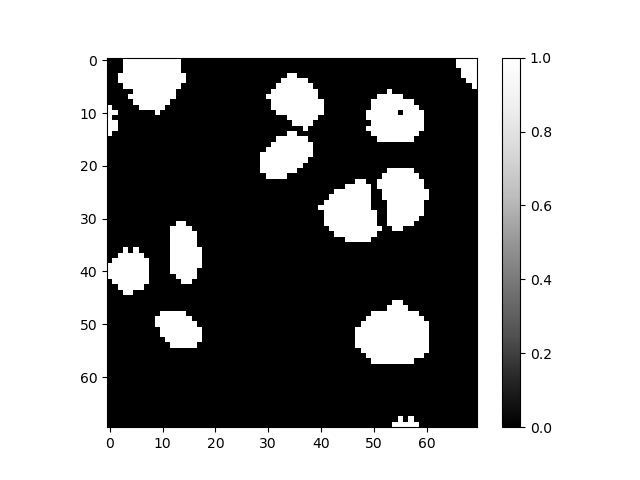
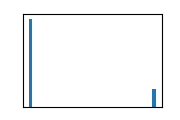

In [5]:
split_objects2 = nsbatwm.split_touching_objects(binary, sigma=2)
split_objects2

也可以获取标签图像作为结果。注意，在这种情况下，对象之间的黑线/间隙将不会存在。

StackViewNDArray([[0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
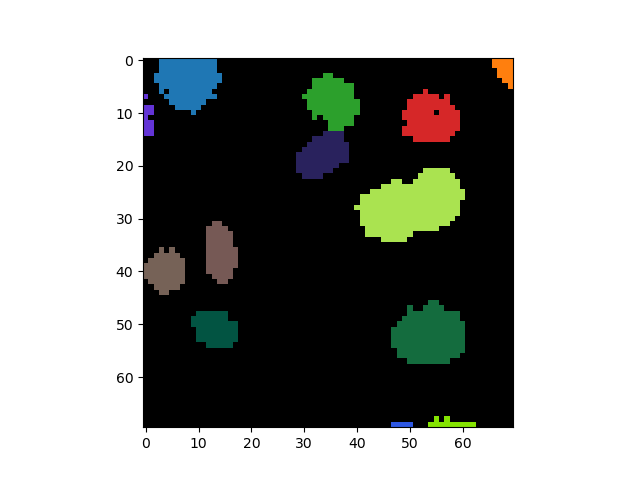

In [6]:
touching_labels = nsitk.touching_objects_labeling(binary)
touching_labels